# Hough Transform
The Hough transform is a feature extraction technique used in image analysis, computer vision, and digital image processing.The purpose of the technique is to find <b>imperfect instances of objects</b> within a certain class of shapes by a voting procedure. This voting procedure is carried out in a parameter space, from which object candidates are obtained as local maxima in a so-called accumulator space that is explicitly constructed by the algorithm for computing the Hough transform.

<b>A bit of history</b> <br/>

The classical Hough transform was concerned with the identification of lines in the image, but later the Hough transform has been extended to identifying positions of arbitrary shapes, most commonly circles or ellipses. The Hough transform as it is universally used today was invented by Richard Duda and Peter Hart in 1972, who called it a "generalized Hough transform". after the related 1962 patent of Paul Hough. The transform was popularized in the computer vision community by Dana H. Ballard through a 1981 journal article titled "Generalizing the Hough transform to detect arbitrary shapes".

# Rationale
From edges to boundaries...
Edges:
    - local discontinuities
    - points
    - not based on models
Boundaries:
    - extends beyond local information
    - composed of many points
    - may depend on models

Hough transform is useful for detecting any parametric curve (line, circle, ellipse, parabola).
Given a set of edge points, it finds the lines that best explain the data. It is robust to gaps, outputiing connected shapes.

# Algorithm

1. Get the edge image. </br>
2. Initialize an accumulator array that discretizes the parameter space.</br>
3. For each edge element, increment the cell in the accumulator array that solves the desired shape equation in the parameter space. </br>
4. Find peaks/local maximas in the accumulator.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
# Draw the lines represented in the hough accumulator on the original image
def drawhoughLinesOnImage(image, houghLines):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            
            cv2.line(image,(x1,y1),(x2,y2),(0,255,0), 2)   

# Different weights are added to the image to give a feeling of blending
def blend_images(image, final_image, alpha=0.7, beta=1., gamma=0.):
    return cv2.addWeighted(final_image, alpha, image, beta,gamma)

In [31]:
#img = cv2.imread('edward_munch.jpeg')
#gray=img[:,:,0]
img = cv2.imread('route66.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

blurredImage = cv2.GaussianBlur(gray, (5, 5), 0.7)
edgeImage = cv2.Canny(blurredImage,130,180,apertureSize = 3)
cv2.imwrite('edges.jpg',edgeImage)


True

In [41]:
# Detect points that form a line
dis_reso = 1 # Distance resolution in pixels of the Hough grid
theta = np.pi /180 # Angular resolution in radians of the Hough grid
threshold = 250# minimum no of votes

houghLines = cv2.HoughLines(edgeImage, dis_reso, theta, threshold)

houghLinesImage = np.zeros_like(img) # create and empty image

drawhoughLinesOnImage(houghLinesImage, houghLines) # draw the lines on the empty image
copy_img = img.copy()
copy_img[:, :, [0, 2]] = copy_img[:, :, [2, 0]]
originalImageWithHoughLines = blend_images(houghLinesImage,copy_img) # add two images together, using image blending

(-0.5, 699.5, 393.5, -0.5)

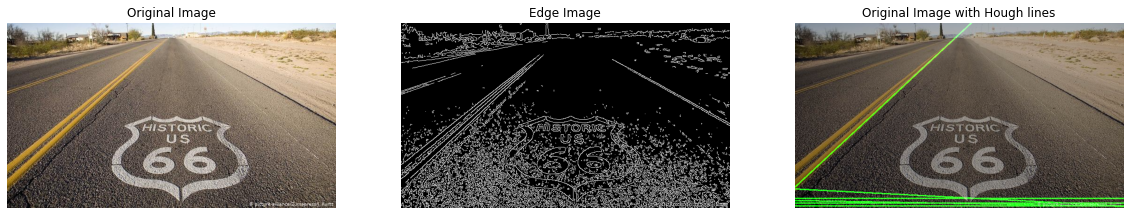

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
ax1.imshow(copy_img)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(edgeImage, cmap='gray')
ax2.set_title('Edge Image')
ax2.axis('off')

ax3.imshow(originalImageWithHoughLines, cmap='gray')
ax3.set_title("Original Image with Hough lines")
ax3.axis('off')

# Probabilistic Hough Transform
In the hough transform, you can see that even for a line with two arguments, it takes a lot of computation. Probabilistic Hough Transform is an optimization of Hough Transform we saw. It doesn’t take all the points into consideration, instead take only a random subset of points and that is sufficient for line detection. Just we have to decrease the threshold.

In [43]:
minLineLength = 100
maxLineGap = 10
threshold=20
linesP = cv2.HoughLinesP(edgeImage, dis_reso, theta, threshold,minLineLength,maxLineGap)
houghLinesImageP = np.zeros_like(img)
for lin in linesP:
    for x1,y1,x2,y2 in lin:
        cv2.line(houghLinesImageP,(x1,y1),(x2,y2),(0,255,0),2)
originalImageWithHoughLinesP = blend_images(houghLinesImageP,copy_img) # add two images together, using image blending

(-0.5, 699.5, 393.5, -0.5)

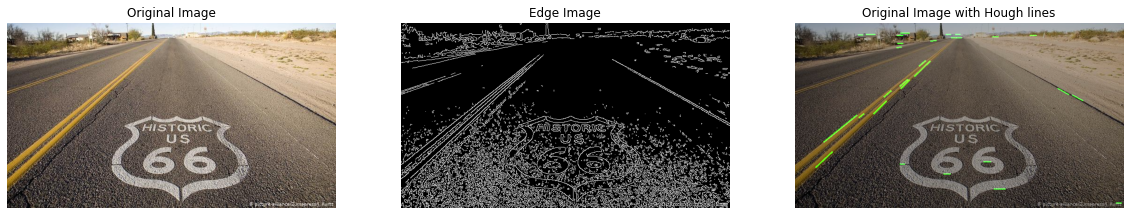

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
ax1.imshow(copy_img)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(edgeImage, cmap='gray')
ax2.set_title('Edge Image')
ax2.axis('off')

ax3.imshow(originalImageWithHoughLinesP, cmap='gray')
ax3.set_title("Original Image with Hough lines")
ax3.axis('off')